In [1]:
import pypsa

In [2]:
n = pypsa.Network('UK+IE_20_gf-95_3H.nc')
#n = pypsa.Network('germany_333_pp-2013.nc')

Importing PyPSA from older version of PyPSA than current version 0.16.1.
Please read the release notes at https://pypsa.org/doc/release_notes.html
carefully to prepare your network for import.

INFO:pypsa.io:Imported network UK+IE_20_gf-95_3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


In [3]:
len(n.buses)

20

In [4]:
# buses, carriers, generators, lines, links, storage_units
# buses_t, carriers_t, generators_t, loads_t, storage_units_t
n.generators[n.generators.carrier != 'load'].efficiency
# how to add lines? 
# efficiency?
# loads?

name
GB0 0 OCGT          0.39
GB0 0 offwind-ac    1.00
GB0 0 offwind-dc    1.00
GB0 0 onwind        1.00
GB0 0 solar         1.00
                    ... 
GB1 9 onwind        1.00
GB1 9 solar         1.00
IE0 0 offwind-ac    1.00
IE0 0 onwind        1.00
IE0 0 solar         1.00
Name: efficiency, Length: 80, dtype: float64

In [5]:
import pandas as pd

In [6]:
bus_sizes = pd.concat((n.generators.query('carrier != "load"').groupby(['bus', 'carrier']).p_nom_opt.sum(),
                        n.storage_units.groupby(['bus', 'carrier']).p_nom_opt.sum()))
bus_sizes
tech_colors = {'OCGT': 'brown',
              'offwind-ac':'blue',
              'offwind-dc':'blue',
              'onwind':'cyan',
              'solar':'yellow',
              'battery':'black',
              'H2':'black',
              'ror':'magenta',
              'PHS':'black',
              'hydro':'black'}

#tech_colors = {"onwind" : "#235ebc",
#    'offwind-ac' : "#6895dd",
#    'offwind-dc' : "#74c6f2",
#    "hydro" : "#08ad97",
#    "PHS" : "#08ad97",
#    "ror" : "#4adbc8",
#    'solar' : "#f9d002",
#    "OCGT" : "#d35050",
#    "H2" : "#ea048a",
#    "battery": "#b8ea04"}

bus_sizes.index.unique('carrier')

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Index(['OCGT', 'offwind-ac', 'offwind-dc', 'onwind', 'solar', 'ror', 'H2',
       'battery', 'PHS', 'hydro'],
      dtype='object', name='carrier')

In [7]:
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

/home/ws/eb5194/miniconda3/envs/pypsa-eur-tutorial/lib/python3.8/site-packages/pypsa/plot.py:195: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(projection=projection)


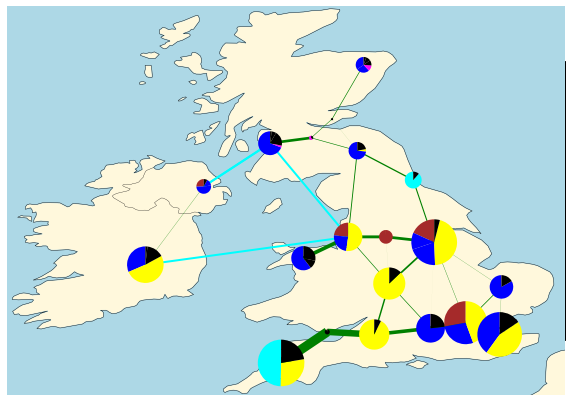

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})
fig.set_size_inches(10,10)


n.plot(color_geomap={'ocean': 'lightblue', 'land': 'cornsilk'}, boundaries=[-10.5, 2, 50, 58.7],
       bus_sizes = bus_sizes/1e5,#n.loads_t.p_set.mean()/10,
       bus_colors=tech_colors,
       line_widths=n.lines_t.p0.mean()/5e2)

plt.show()

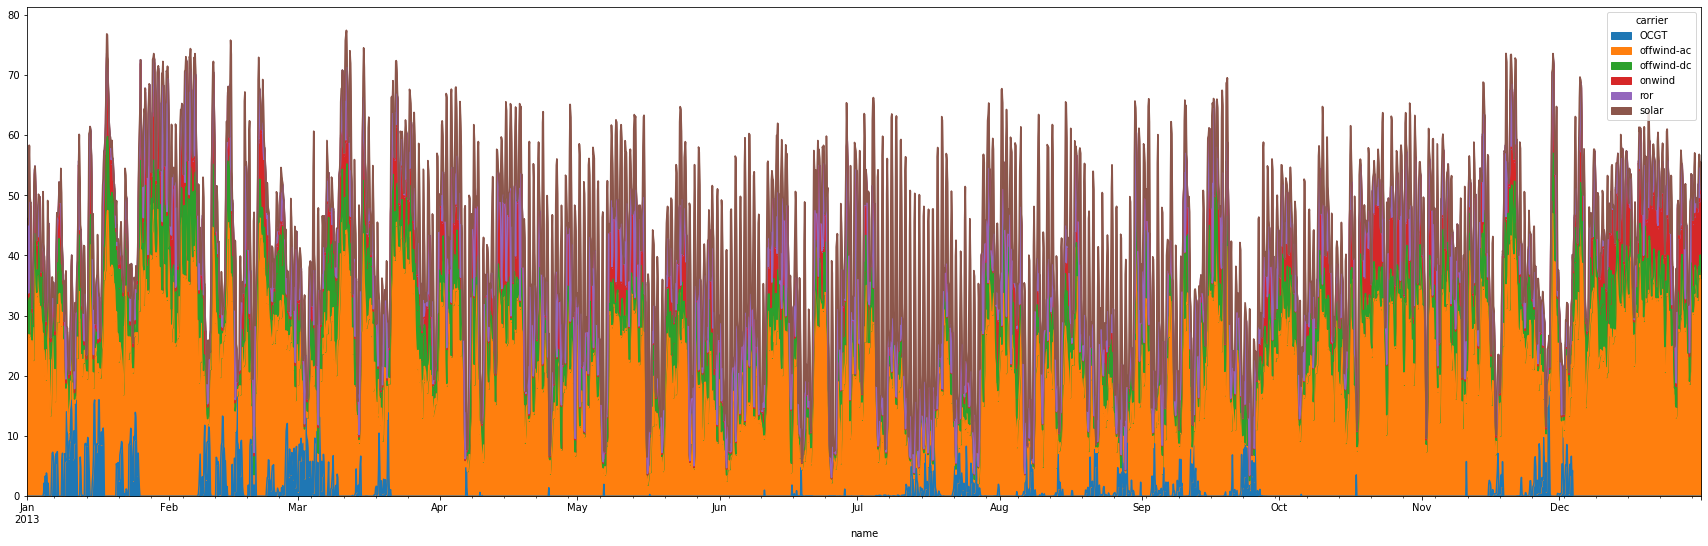

In [9]:
p_by_carrier = n.generators_t.p.groupby(n.generators.carrier,axis=1).sum()

fig,ax = plt.subplots(1,1)
fig.set_size_inches(30,9)

(p_by_carrier/1e3).plot(ax=ax,
                        kind="area")

In [10]:
import numpy as np

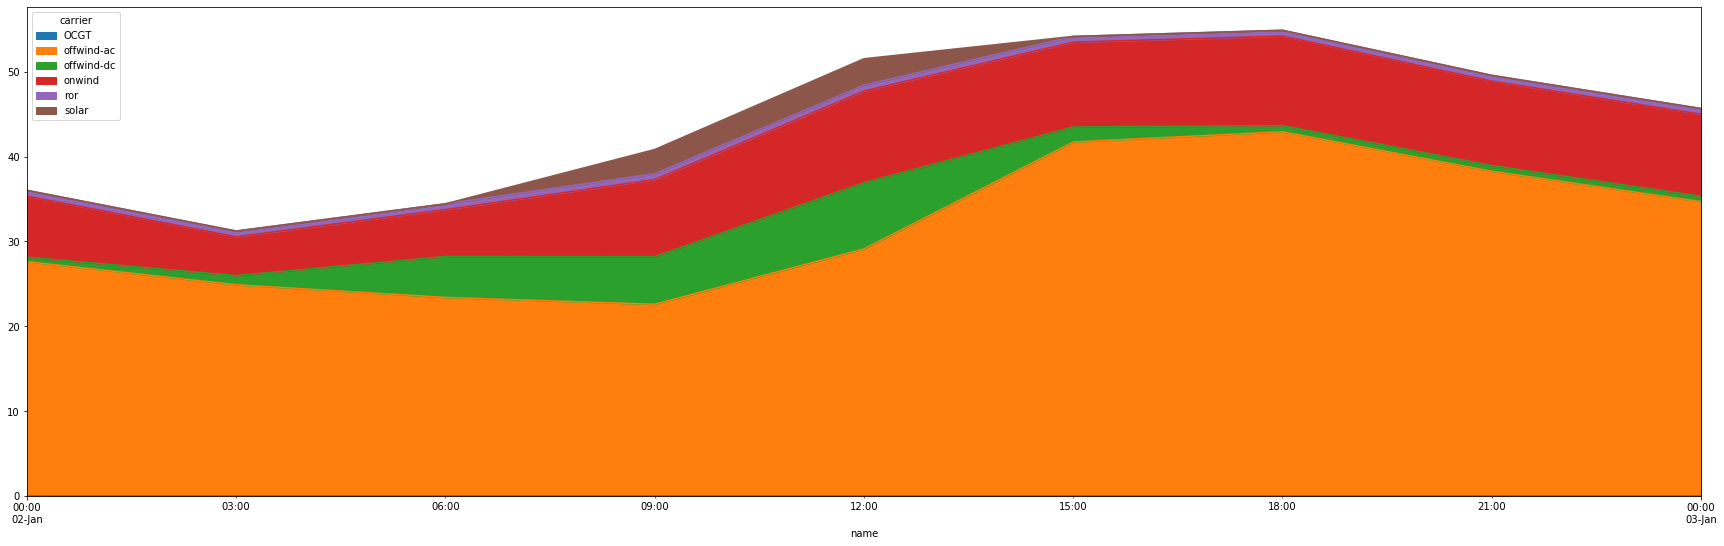

In [11]:
where = np.arange(8,8+9)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(30,9)

(p_by_carrier.iloc[where]/1e3).plot(ax=ax,
                        kind="area")

In [12]:
capacity = n.generators.groupby("carrier").sum().p_nom_opt

p_available = n.generators_t.p_max_pu.multiply(n.generators["p_nom_opt"])#.where(lambda df: df<=1., other=1.)
p_available_by_carrier = p_available.groupby(n.generators.carrier,axis=1).sum()
p_available_by_carrier = p_available_by_carrier[['offwind-ac', 'offwind-dc', 'onwind', 'ror', 'solar']]#only renewables

(0, 17000)

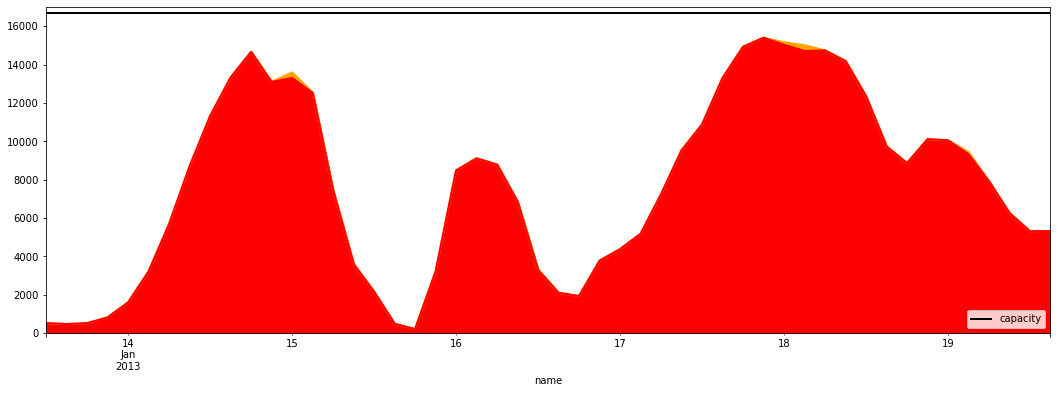

In [13]:
where=np.arange(100,150)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18,6)

p_available_by_carrier['onwind'].iloc[where].plot(ax=ax, kind="area",linewidth=2, color=['orange'])
p_by_carrier['onwind'].iloc[where].plot(ax=ax, kind="area",linewidth=2, color=['red'])
cap = pd.DataFrame(index=p_by_carrier.index, columns = ['capacity'], data=capacity.loc['onwind'])
cap.iloc[where].plot(ax=ax, linewidth=2, color=['black'])
ax.set_ylim([0,17000])

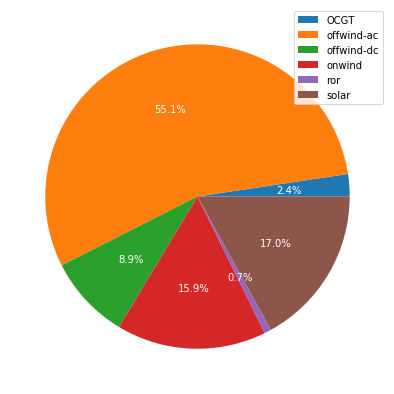

In [14]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

x_list = p_by_carrier.sum()
label_list = x_list.index

wedges, texts, autotexts = ax.pie(x_list, autopct="%1.1f%%", textprops=dict(color="white"))
ax.legend(wedges, label_list)

plt.show()

In [15]:
x_list/x_list.sum()*100

carrier
OCGT           2.372152
offwind-ac    55.095848
offwind-dc     8.913761
onwind        15.899441
ror            0.728172
solar         16.990626
dtype: float64